In [1]:
import os
#os.chdir(f"..")
from utilities import *
from plot_utilities import *
import matlab.engine 
import scipy.stats as stats

In [2]:
def nearby_df(r, eta, n=10000, bound=0.1, grid_amt= 5, iterations = 10, rounded = 3):
    prior_cdf = compute_prior_cdf(r, eta, n_samples = 10000, tail_bound = 0.01, tail_percent = 0.01, scipy_int=True, support = False)
    check_r = np.linspace(r-bound, r+bound, 2*grid_amt+1)

    check_eta = np.linspace(eta-bound, eta+bound, 2*grid_amt+1)

    df = pd.DataFrame(columns = ["r", "eta", "distance", "pvalue"])
    for r_prime in check_r:
        for eta_prime in check_eta:
            total_distance, total_pvalue = 0, 0
            r_prime = np.round(r_prime, rounded)
            eta_prime = np.round(eta_prime, rounded)
            for _ in range(iterations):
                obs_x = sample_prior(r_prime, eta_prime, size = n)
                distance, pvalue = kstest_custom(obs_x, prior_cdf)
                total_distance += distance
                total_pvalue += pvalue
            
            avg_distance = total_distance/iterations
            avg_pvalue = total_pvalue/iterations
            df.loc[len(df)] = [r_prime, eta_prime, avg_distance, avg_pvalue]
    return df

In [3]:
def KSHeatMap(r, eta, n=10000, bound=0.1, grid_amt= 5, iterations = 10, dist = True, pval = True, rounded = 3):
    df = nearby_df(r, eta, iterations=iterations, n=n, bound = bound, grid_amt=grid_amt, rounded=rounded)
    if dist:
        fig, ax = plt.subplots(figsize=(1.6*grid_amt, 1.6*grid_amt))
        result = df.pivot(index='eta', columns='r', values='distance').sort_values("eta", ascending=True)
        sns.heatmap(result, annot=True, fmt=f".3f", ax =ax, square=True)
        plt.title(f"r = {r} eta = {eta}, Distances")
        plt.yticks(rotation=0)
        plt.xticks(rotation=0)
        ax.invert_yaxis()
        plt.show()
    if pval:
        fig, ax = plt.subplots(figsize=(1.6*grid_amt, 1.6*grid_amt))
        result = df.pivot(index='eta', columns='r', values='pvalue').sort_values("eta", ascending=True)
        sns.heatmap(result, annot=True, fmt=f".3f", cmap = "RdYlGn", vmin = 0.01, vmax = 0.2, square=True)
        plt.title(f"r = {r} eta = {eta}, pvalues")
        plt.yticks(rotation=0)
        plt.xticks(rotation=0)
        ax.invert_yaxis()
        plt.show()

In [8]:
full_params = pd.read_csv("panoptic/CSVs/final_grid_df.csv", index_col='layer')[["num_samples", "best_r_cd", "best_eta_cd", "kstest_stat_cd"]]
full_params

,num_samples,best_r_cd,best_eta_cd,kstest_stat_cd
layer,,,,
2,3180,0.602,3.20,0.036033
3,12720,0.705,3.60,0.019860
4,50880,0.803,3.00,0.010449
5,203520,0.904,1.60,0.004425
6,814080,1.030,0.33,0.003707
7,3256320,4.630,0.00,0.024879
8,13025280,5.700,-0.10,0.163580


# Layer 2 r = 0.6020 $\eta$ = 3.20 Observed Stat = 0.036

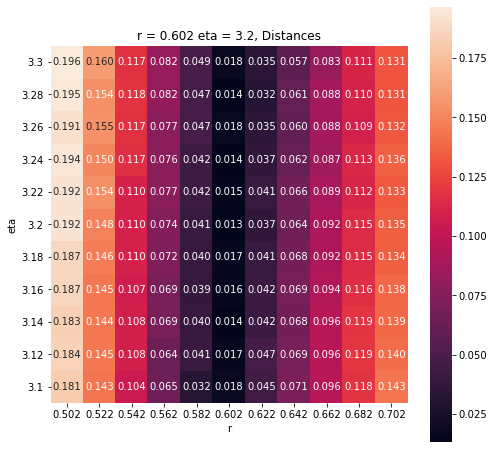

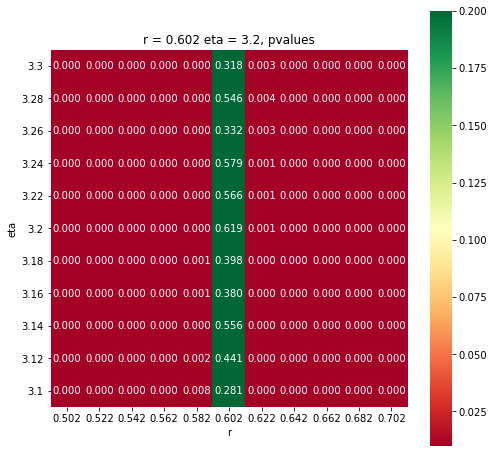

In [10]:
KSHeatMap(full_params.loc[2, 'best_r_cd'], full_params.loc[2, 'best_eta_cd'], full_params.loc[2, 'num_samples'], iterations = 10, bound = 0.1, grid_amt = 5, rounded = 3)

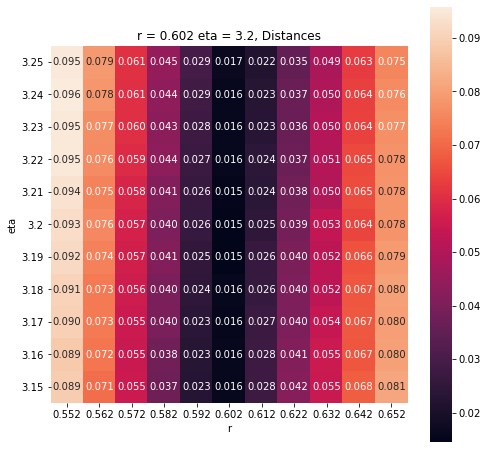

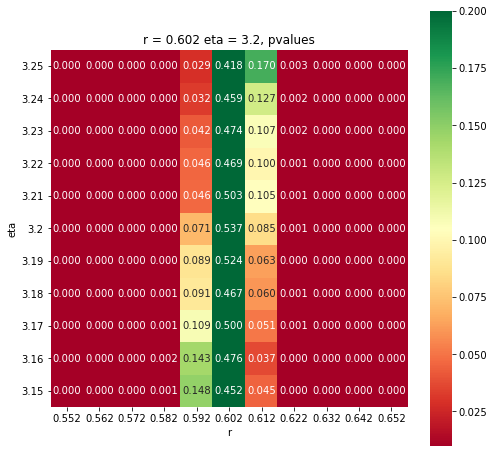

In [7]:
KSHeatMap(full_params.loc[2, 'best_r_cd'], full_params.loc[2, 'best_eta_cd'], full_params.loc[2, 'num_samples'], iterations = 10, bound = 0.05, grid_amt = 5, rounded = 3)

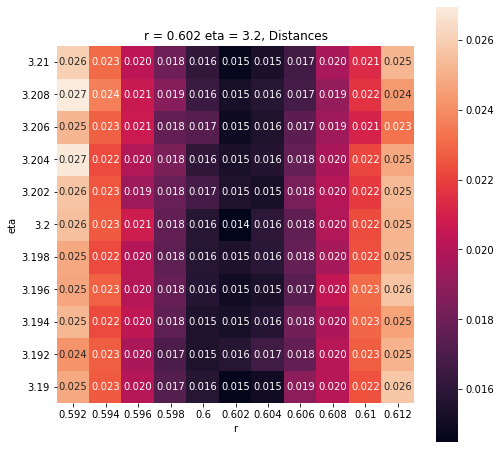

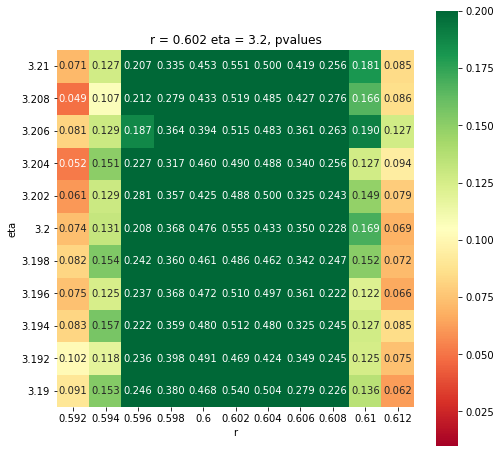

In [8]:
KSHeatMap(full_params.loc[2, 'best_r_cd'], full_params.loc[2, 'best_eta_cd'], full_params.loc[2, 'num_samples'], iterations = 10, bound = 0.01, grid_amt = 5, rounded = 3)

# Layer 3 r = 0.7048 $\eta$ = 3.63 Observed Stat = 0.0184

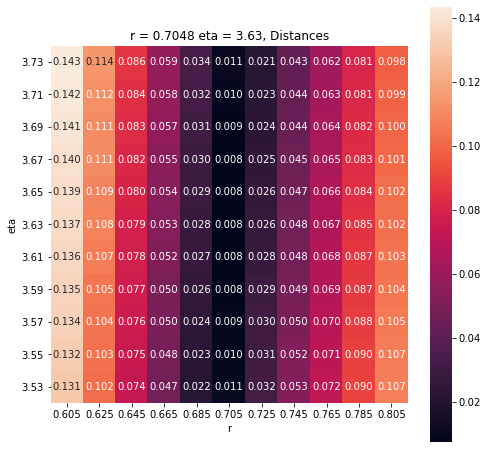

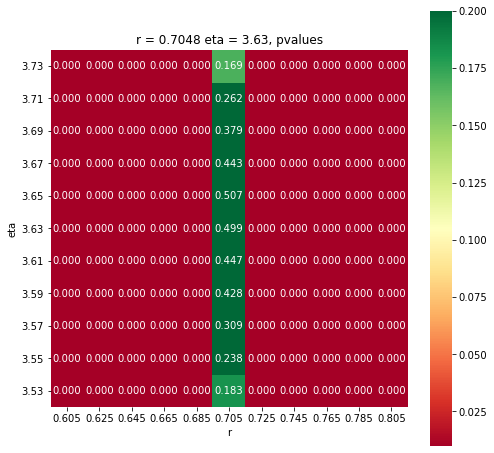

In [9]:
KSHeatMap(full_params.loc[3, 'best_r_cd'], full_params.loc[3, 'best_eta_cd'], full_params.loc[3, 'num_samples'], iterations = 10, bound = 0.1, grid_amt = 5, rounded = 3)

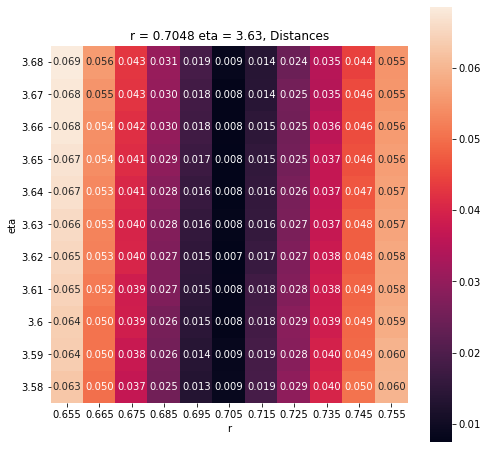

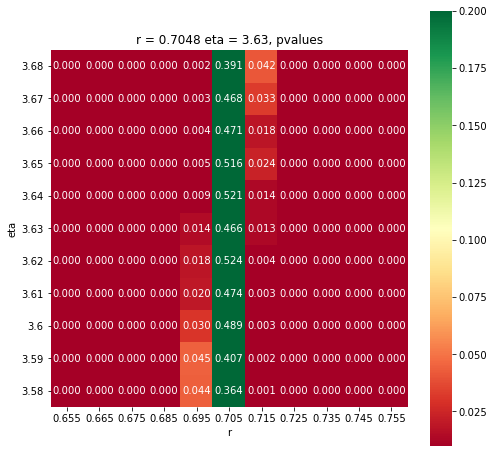

In [10]:
KSHeatMap(full_params.loc[3, 'best_r_cd'], full_params.loc[3, 'best_eta_cd'], full_params.loc[3, 'num_samples'], iterations = 10, bound = 0.05, grid_amt = 5, rounded = 3)

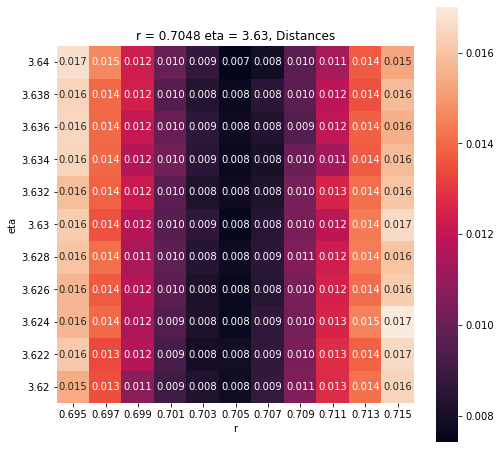

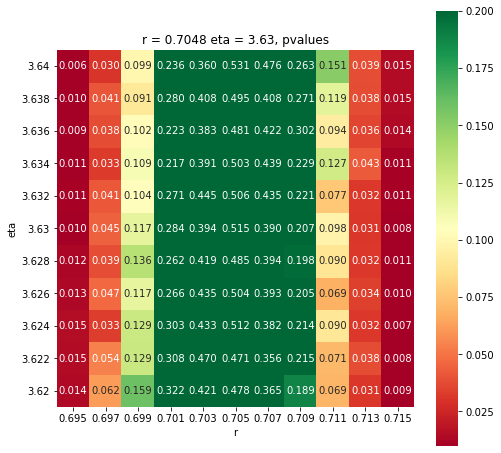

In [11]:
KSHeatMap(full_params.loc[3, 'best_r_cd'], full_params.loc[3, 'best_eta_cd'], full_params.loc[3, 'num_samples'], iterations = 10, bound = 0.01, grid_amt = 5, rounded = 3)

# Layer 4 r = 0.8026 $\eta$ = 3.01 Observed Stat = 0.218044

No Tail


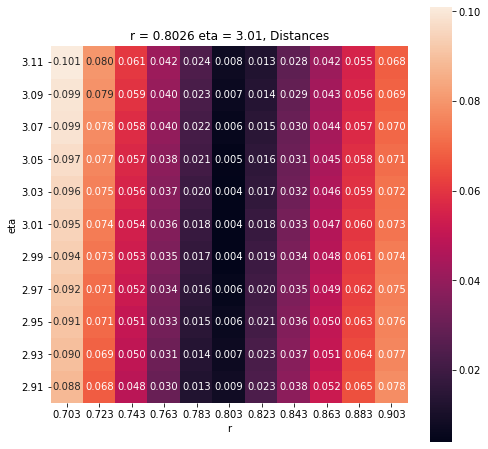

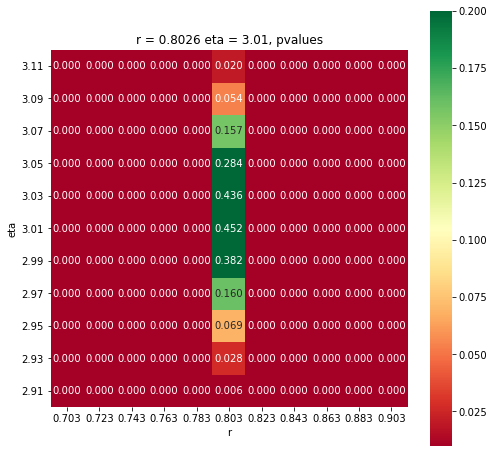

In [12]:
KSHeatMap(full_params.loc[4, 'best_r_cd'], full_params.loc[4, 'best_eta_cd'], full_params.loc[4, 'num_samples'], iterations = 10, bound = 0.1, grid_amt = 5, rounded = 3)

No Tail


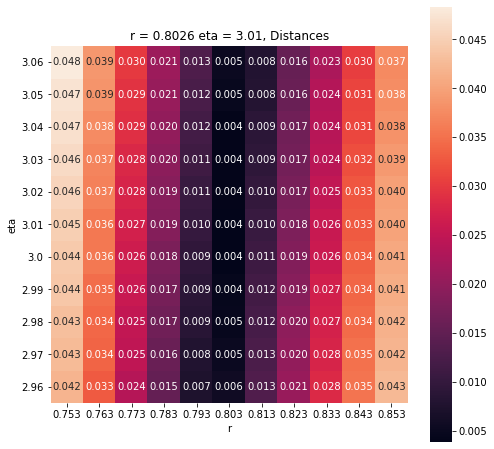

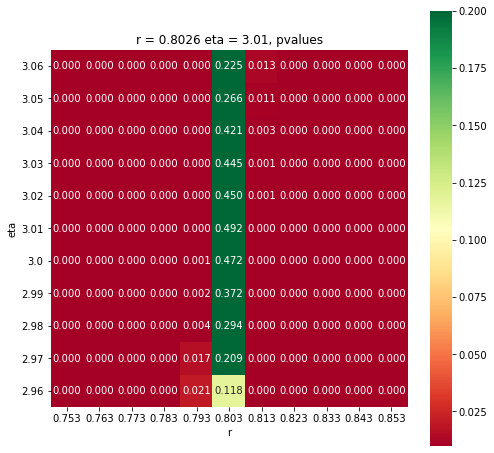

In [13]:
KSHeatMap(full_params.loc[4, 'best_r_cd'], full_params.loc[4, 'best_eta_cd'], full_params.loc[4, 'num_samples'], iterations = 10, bound = 0.05, grid_amt = 5, rounded = 3)

No Tail


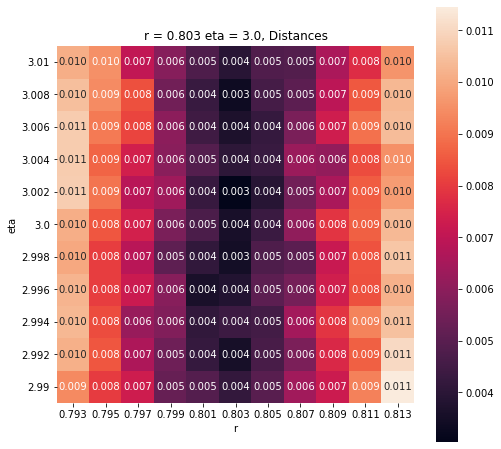

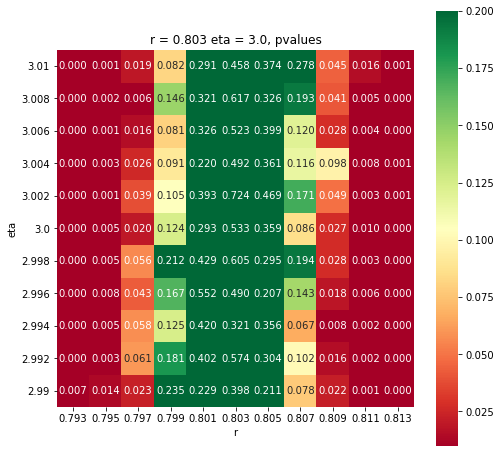

In [11]:
KSHeatMap(full_params.loc[4, 'best_r_cd'], full_params.loc[4, 'best_eta_cd'], full_params.loc[4, 'num_samples'], iterations = 10, bound = 0.01, grid_amt = 5, rounded = 3)

# Layer 5 r = 0.904 $\eta$ = 1.62 stat = 0.003

No Tail


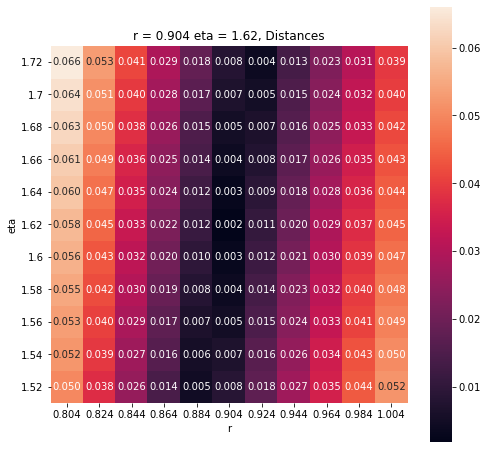

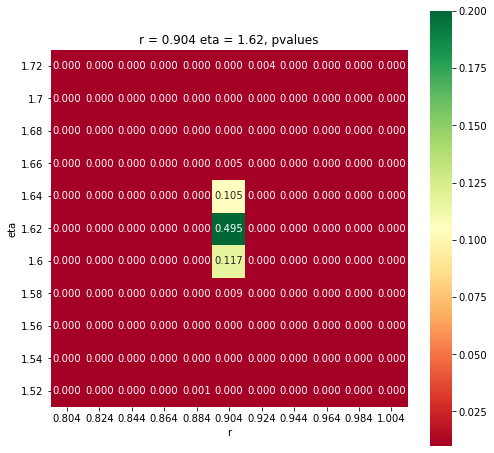

In [15]:
KSHeatMap(full_params.loc[5, 'best_r_cd'], full_params.loc[5, 'best_eta_cd'], full_params.loc[5, 'num_samples'], iterations = 10, bound = 0.1, grid_amt = 5, rounded = 3)

No Tail


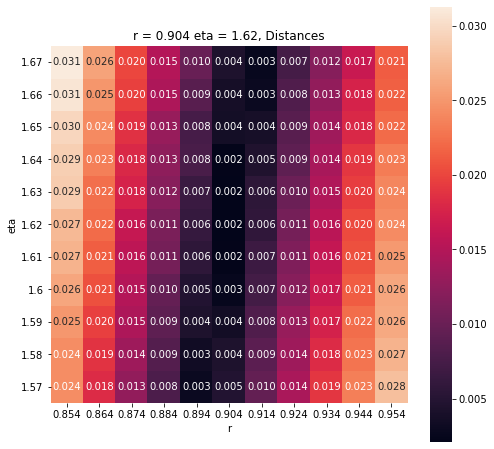

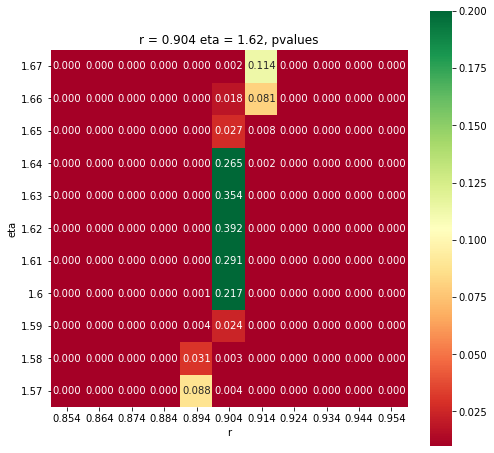

In [16]:
KSHeatMap(full_params.loc[5, 'best_r_cd'], full_params.loc[5, 'best_eta_cd'], full_params.loc[5, 'num_samples'], iterations = 10, bound = 0.05, grid_amt = 5, rounded = 3)

No Tail


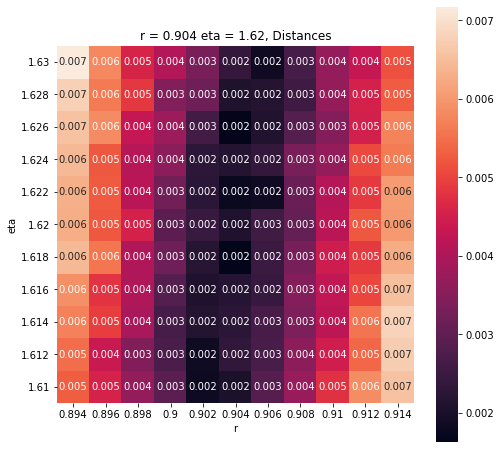

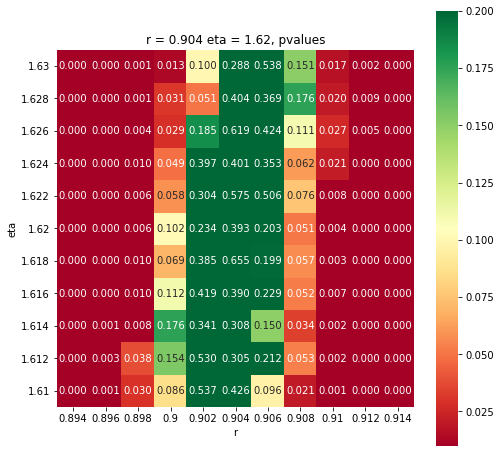

In [17]:
KSHeatMap(full_params.loc[5, 'best_r_cd'], full_params.loc[5, 'best_eta_cd'], full_params.loc[5, 'num_samples'], iterations = 10, bound = 0.01, grid_amt = 5, rounded = 3)

No Tail


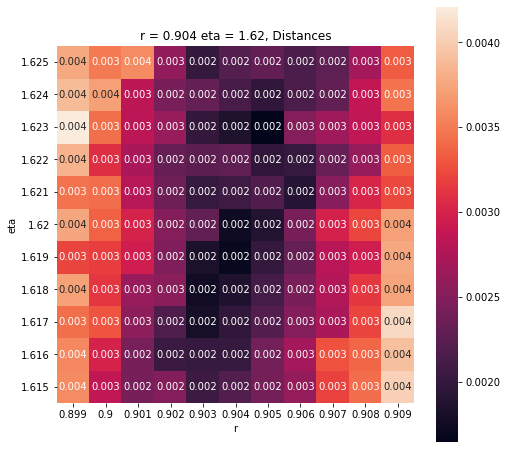

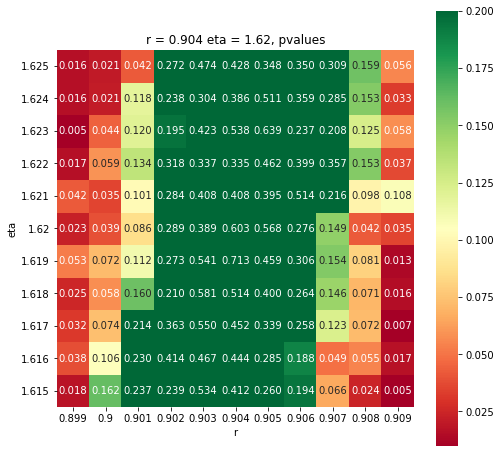

In [18]:
KSHeatMap(full_params.loc[5, 'best_r_cd'], full_params.loc[5, 'best_eta_cd'], full_params.loc[5, 'num_samples'], iterations = 10, bound = 0.005, grid_amt = 5, rounded = 3)

# Layer 6 r = 1.028 $\eta$ = 0.33 stat = 0.003651

No Tail


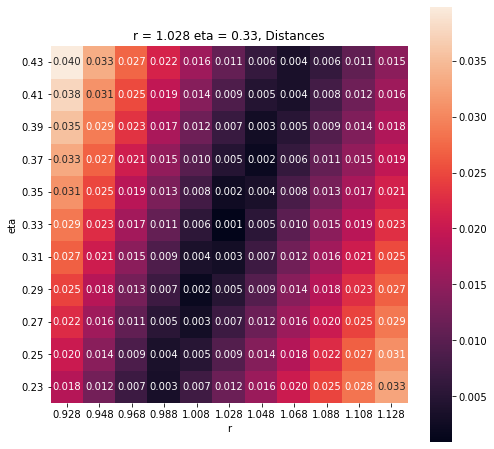

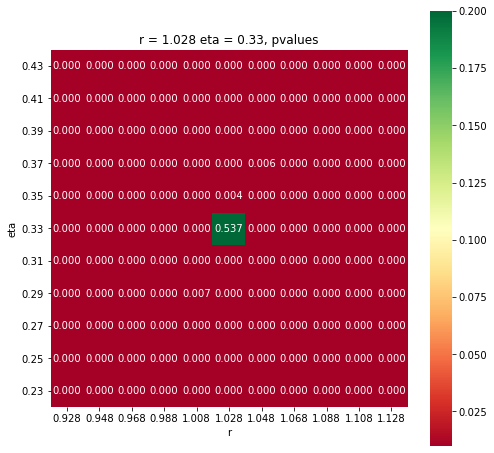

In [19]:
KSHeatMap(full_params.loc[6, 'best_r_cd'], full_params.loc[6, 'best_eta_cd'], full_params.loc[6, 'num_samples'], iterations = 10, bound = 0.1, grid_amt = 5, rounded = 3)

No Tail


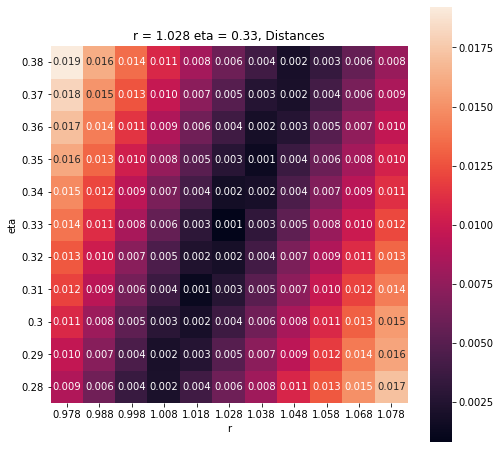

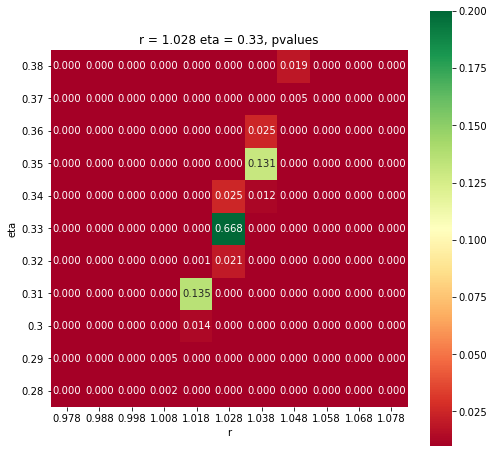

In [20]:
KSHeatMap(full_params.loc[6, 'best_r_cd'], full_params.loc[6, 'best_eta_cd'], full_params.loc[6, 'num_samples'], iterations = 10, bound = 0.05, grid_amt = 5, rounded = 3)

No Tail


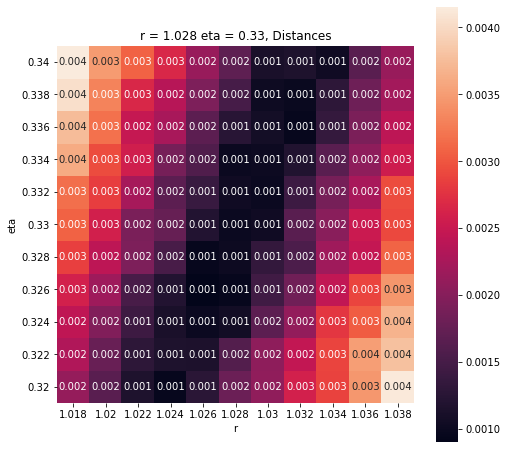

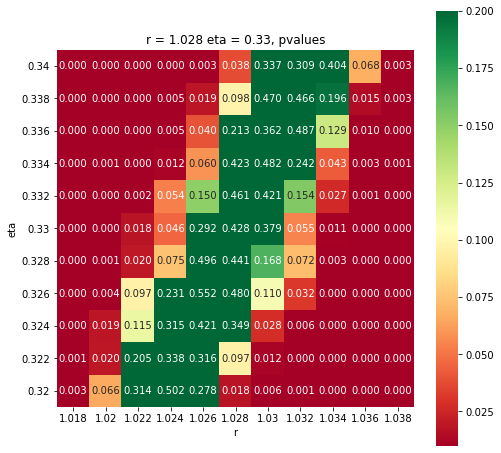

In [21]:
KSHeatMap(full_params.loc[6, 'best_r_cd'], full_params.loc[6, 'best_eta_cd'], full_params.loc[6, 'num_samples'], iterations = 10, bound = 0.01, grid_amt = 5, rounded = 3)

No Tail


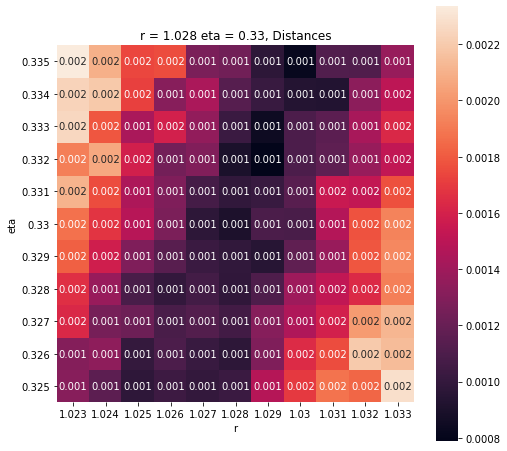

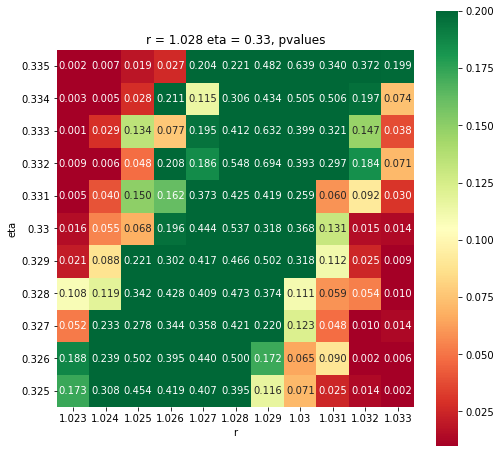

In [22]:
KSHeatMap(full_params.loc[6, 'best_r_cd'], full_params.loc[6, 'best_eta_cd'], full_params.loc[6, 'num_samples'], iterations = 10, bound = 0.005, grid_amt = 5, rounded = 3)

No Tail


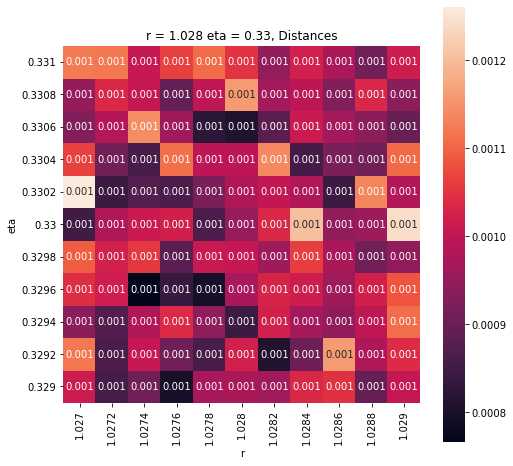

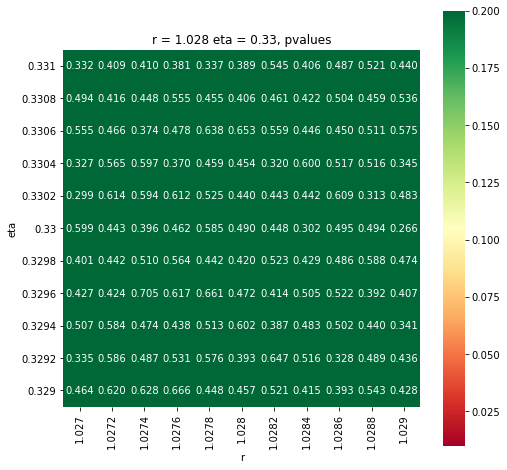

In [23]:
KSHeatMap(full_params.loc[6, 'best_r_cd'], full_params.loc[6, 'best_eta_cd'], full_params.loc[6, 'num_samples'], iterations = 10, bound = 0.001, grid_amt = 5, rounded = 4)

# Layer 7 r = 4.629 $\eta$ = 0 stat = 0.24877 stat = 0.024877

No Tail


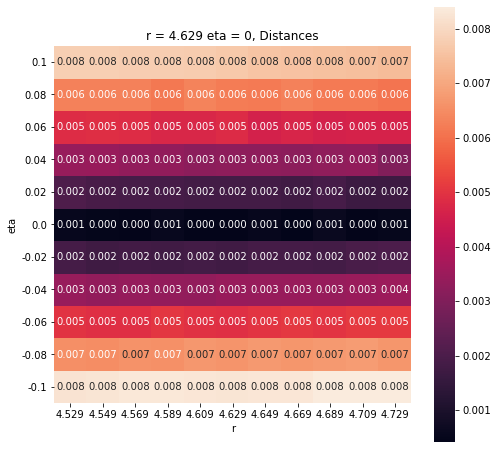

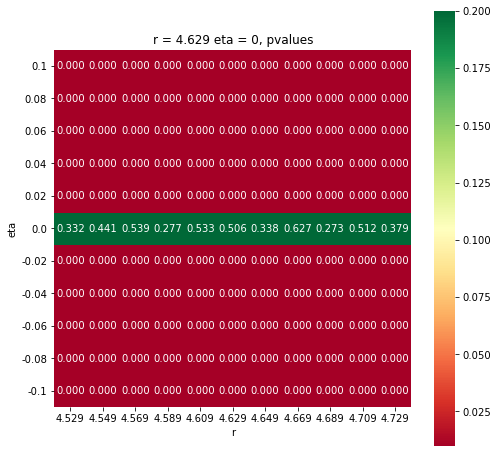

In [24]:
KSHeatMap(full_params.loc[7, 'best_r_cd'], full_params.loc[7, 'best_eta_cd'], full_params.loc[7, 'num_samples'], iterations = 10, bound = 0.1, grid_amt = 5, rounded = 3)

No Tail


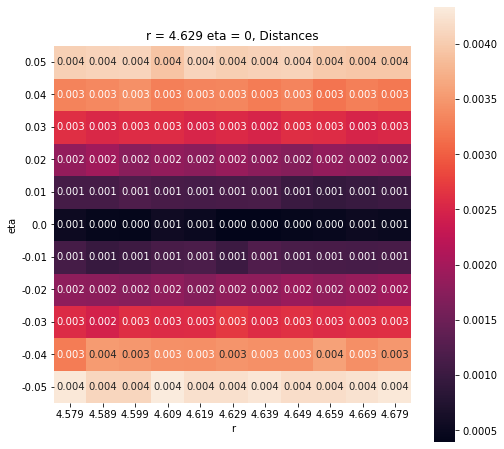

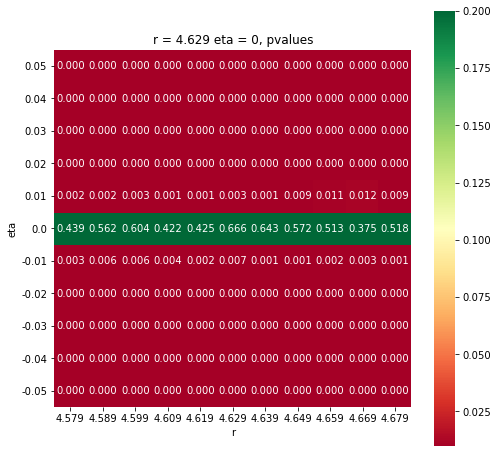

In [25]:
KSHeatMap(full_params.loc[7, 'best_r_cd'], full_params.loc[7, 'best_eta_cd'], full_params.loc[7, 'num_samples'], iterations = 10, bound = 0.05, grid_amt = 5, rounded = 3)

No Tail


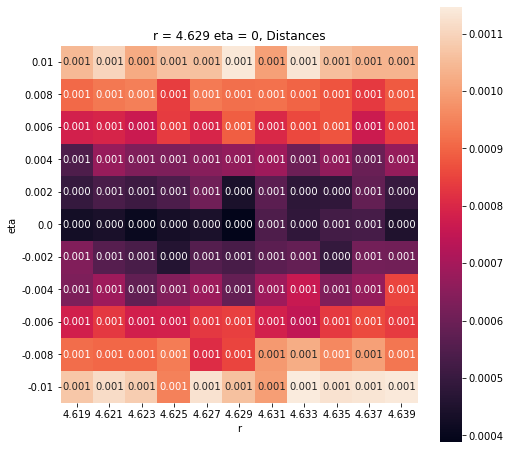

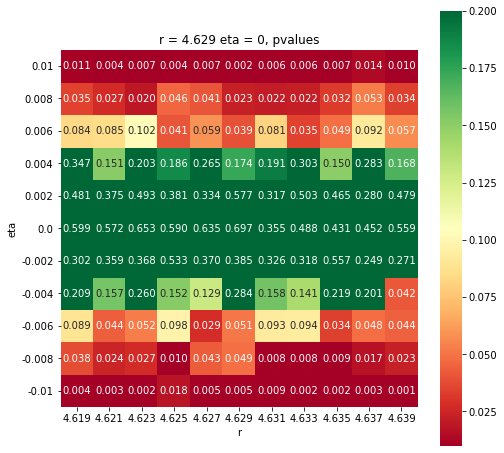

In [26]:
KSHeatMap(full_params.loc[7, 'best_r_cd'], full_params.loc[7, 'best_eta_cd'], full_params.loc[7, 'num_samples'], iterations = 10, bound = 0.01, grid_amt = 5, rounded = 3)

# Layer 8 r = 5.701 $\eta$ = 0 stat = 0.24877 stat = 0.171259

No Tail


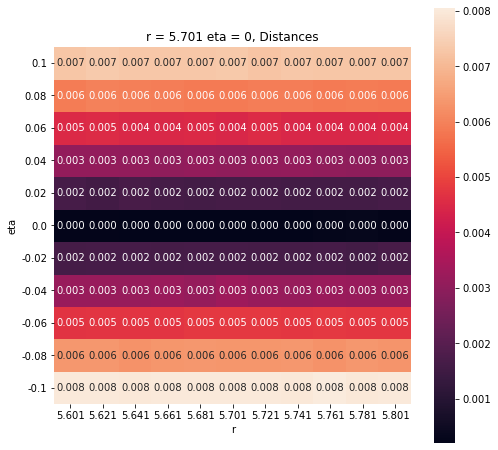

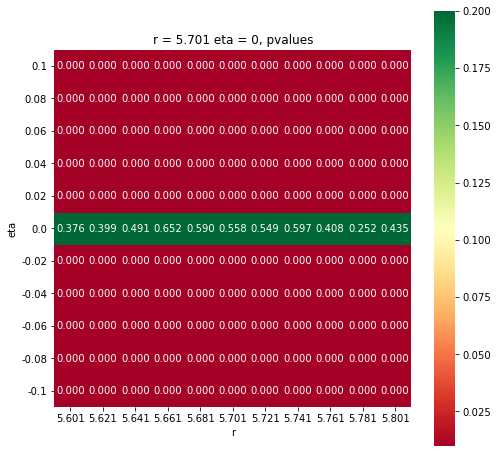

In [28]:
KSHeatMap(full_params.loc[8, 'best_r_cd'], full_params.loc[8, 'best_eta_cd'], full_params.loc[8, 'num_samples'], iterations = 10, bound = 0.1, grid_amt = 5, rounded = 3)

No Tail


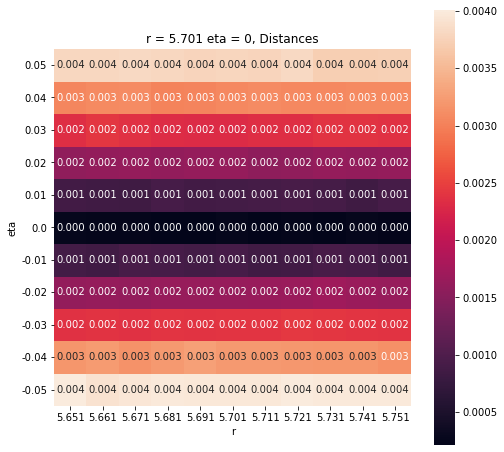

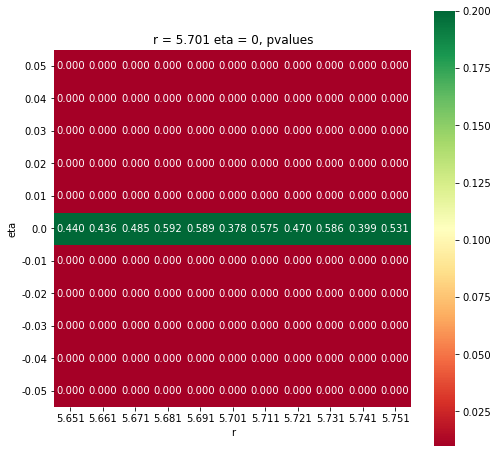

In [29]:
KSHeatMap(full_params.loc[8, 'best_r_cd'], full_params.loc[8, 'best_eta_cd'], full_params.loc[8, 'num_samples'], iterations = 10, bound = 0.05, grid_amt = 5, rounded = 3)

No Tail


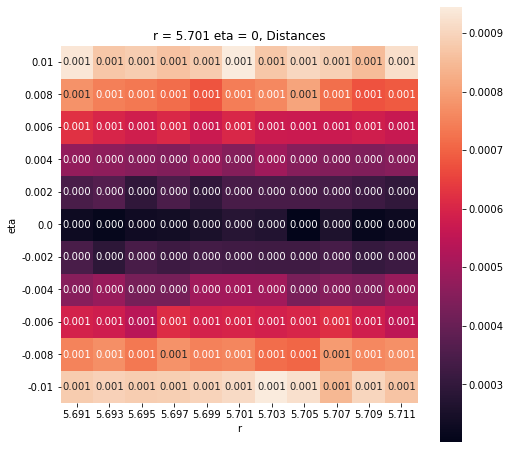

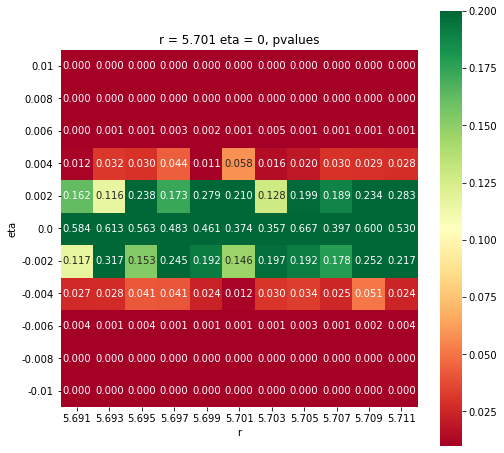

In [30]:
KSHeatMap(full_params.loc[8, 'best_r_cd'], full_params.loc[8, 'best_eta_cd'], full_params.loc[8, 'num_samples'], iterations = 10, bound = 0.01, grid_amt = 5, rounded = 3)